# Health Insurance Claim Prediction - Comprehensive ML Project

## Problem Statement
Predict health insurance claim amounts based on various demographic, health, and lifestyle factors. This project demonstrates comprehensive machine learning techniques including regression, classification, clustering, dimensionality reduction, and neural networks.

## Dataset
- **Source**: healthinsurance.csv
- **Target Variable**: claim (insurance claim amount)
- **Features**: age, sex, weight, BMI, hereditary_diseases, no_of_dependents, smoker, city, bloodpressure, diabetes, regular_ex, job_title


In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Set style for better visualizations
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

# Display settings
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

print("Libraries imported successfully!")


Libraries imported successfully!


# UNIT I: Introduction and Data Preparation
## Data Loading and Initial Exploration


In [2]:
# Load the dataset
df = pd.read_csv('healthinsurance.csv')

# Basic information about the dataset
print("="*60)
print("DATASET OVERVIEW")
print("="*60)
print(f"\nDataset Shape: {df.shape}")
print(f"Number of Rows: {df.shape[0]}")
print(f"Number of Columns: {df.shape[1]}")

print("\n" + "="*60)
print("COLUMN NAMES AND DATA TYPES")
print("="*60)
print(df.dtypes)

print("\n" + "="*60)
print("FIRST FEW ROWS")
print("="*60)
df.head(10)


DATASET OVERVIEW

Dataset Shape: (15000, 13)
Number of Rows: 15000
Number of Columns: 13

COLUMN NAMES AND DATA TYPES
age                    float64
sex                     object
weight                   int64
bmi                    float64
hereditary_diseases     object
no_of_dependents         int64
smoker                   int64
city                    object
bloodpressure            int64
diabetes                 int64
regular_ex               int64
job_title               object
claim                  float64
dtype: object

FIRST FEW ROWS


,age,sex,weight,bmi,hereditary_diseases,no_of_dependents,smoker,city,bloodpressure,diabetes,regular_ex,job_title,claim
0,60.0,male,64,24.3,NoDisease,1,0,NewYork,72,0,0,Actor,13112.6
1,49.0,female,75,22.6,NoDisease,1,0,Boston,78,1,1,Engineer,9567.0
2,32.0,female,64,17.8,Epilepsy,2,1,Phildelphia,88,1,1,Academician,32734.2
3,61.0,female,53,36.4,NoDisease,1,1,Pittsburg,72,1,0,Chef,48517.6
4,19.0,female,50,20.6,NoDisease,0,0,Buffalo,82,1,0,HomeMakers,1731.7
5,42.0,female,89,37.9,NoDisease,0,0,AtlanticCity,78,0,0,Dancer,6474.0
6,18.0,male,59,23.8,NoDisease,0,0,Portland,64,0,0,Singer,1705.6
7,21.0,male,52,26.8,NoDisease,0,0,Cambridge,74,1,0,Actor,1534.3
8,63.0,male,55,NaN,NoDisease,0,0,Hartford,70,1,0,Dancer,13390.6
9,40.0,female,69,29.6,NoDisease,0,0,Springfield,64,1,1,DataScientist,5910.9


In [ ]:
# Check for missing values
print("="*60)
print("MISSING VALUES ANALYSIS")
print("="*60)
missing_values = df.isnull().sum()
missing_percent = (missing_values / len(df)) * 100
missing_df = pd.DataFrame({
    'Missing Count': missing_values,
    'Percentage': missing_percent
})
missing_df = missing_df[missing_df['Missing Count'] > 0]
if len(missing_df) > 0:
    print(missing_df)
else:
    print("No missing values found!")

# Check for duplicates
print(f"\nDuplicate Rows: {df.duplicated().sum()}")

# Basic statistics
print("\n" + "="*60)
print("STATISTICAL SUMMARY")
print("="*60)
df.describe()


MISSING VALUES ANALYSIS
     Missing Count  Percentage
age            396    2.640000
bmi            956    6.373333

Duplicate Rows: 1096

STATISTICAL SUMMARY


,age,weight,bmi,no_of_dependents,smoker,bloodpressure,diabetes,regular_ex,claim
count,14604.000000,15000.000000,14044.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,39.547521,64.909600,30.266413,1.129733,0.198133,68.650133,0.777000,0.224133,13401.437620
std,14.015966,13.701935,6.122950,1.228469,0.398606,19.418515,0.416272,0.417024,12148.239619
min,18.000000,34.000000,16.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1121.900000
25%,27.000000,54.000000,25.700000,0.000000,0.000000,64.000000,1.000000,0.000000,4846.900000
50%,40.000000,63.000000,29.400000,1.000000,0.000000,71.000000,1.000000,0.000000,9545.650000
75%,52.000000,76.000000,34.400000,2.000000,0.000000,80.000000,1.000000,0.000000,16519.125000
max,64.000000,95.000000,53.100000,5.000000,1.000000,122.000000,1.000000,1.000000,63770.400000


In [4]:
# Check unique values in categorical columns
print("="*60)
print("CATEGORICAL VARIABLES ANALYSIS")
print("="*60)
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    print(f"\n{col}:")
    print(f"  Unique values: {df[col].nunique()}")
    print(f"  Value counts:\n{df[col].value_counts().head(10)}")


CATEGORICAL VARIABLES ANALYSIS

sex:
  Unique values: 2
  Value counts:
sex
female    7652
male      7348
Name: count, dtype: int64

hereditary_diseases:
  Unique values: 10
  Value counts:
hereditary_diseases
NoDisease       13998
Diabetes          148
Alzheimer         144
Obesity           136
EyeDisease        123
Cancer            109
Arthritis          96
HeartDisease       93
Epilepsy           84
High BP            69
Name: count, dtype: int64

city:
  Unique values: 91
  Value counts:
city
NewOrleans    302
Nashville     302
Charleston    298
Brimingham    298
Memphis       297
Louisville    293
Charlotte     293
Stamford      280
Newport       280
Harrisburg    280
Name: count, dtype: int64

job_title:
  Unique values: 35
  Value counts:
job_title
Student         1320
HomeMakers       972
Singer           744
Actor            720
FilmMaker        714
Dancer           693
HouseKeeper      667
Manager          602
Police           412
Photographer     400
Name: count, dtype: in

## Data Preprocessing and Cleaning


In [5]:
# Create a copy for preprocessing
df_clean = df.copy()

# Handle missing values in BMI column
print("Handling missing values in BMI column...")
missing_bmi = df_clean['bmi'].isnull().sum()
print(f"Missing BMI values: {missing_bmi}")

# Fill missing BMI with median (more robust to outliers)
df_clean['bmi'].fillna(df_clean['bmi'].median(), inplace=True)

# Handle missing values in bloodpressure
print(f"\nMissing bloodpressure values: {df_clean['bloodpressure'].isnull().sum()}")
df_clean['bloodpressure'].fillna(df_clean['bloodpressure'].median(), inplace=True)

# Verify no missing values remain
print(f"\nRemaining missing values: {df_clean.isnull().sum().sum()}")

# Remove duplicates if any
initial_rows = len(df_clean)
df_clean = df_clean.drop_duplicates()
final_rows = len(df_clean)
print(f"\nRows before removing duplicates: {initial_rows}")
print(f"Rows after removing duplicates: {final_rows}")
print(f"Duplicates removed: {initial_rows - final_rows}")


Handling missing values in BMI column...
Missing BMI values: 956

Missing bloodpressure values: 0

Remaining missing values: 396

Rows before removing duplicates: 15000
Rows after removing duplicates: 13904
Duplicates removed: 1096


In [6]:
# Encode categorical variables
from sklearn.preprocessing import LabelEncoder

# Create label encoders for categorical variables
label_encoders = {}
categorical_features = ['sex', 'hereditary_diseases', 'city', 'job_title']

for col in categorical_features:
    le = LabelEncoder()
    df_clean[col + '_encoded'] = le.fit_transform(df_clean[col])
    label_encoders[col] = le
    print(f"{col}: {len(le.classes_)} unique values encoded")

# Display encoded columns
print("\nEncoded columns created successfully!")
df_clean[['sex', 'sex_encoded', 'hereditary_diseases', 'hereditary_diseases_encoded']].head()


sex: 2 unique values encoded
hereditary_diseases: 10 unique values encoded
city: 91 unique values encoded
job_title: 35 unique values encoded

Encoded columns created successfully!


,sex,sex_encoded,hereditary_diseases,hereditary_diseases_encoded
0,male,1,NoDisease,8
1,female,0,NoDisease,8
2,female,0,Epilepsy,4
3,female,0,NoDisease,8
4,female,0,NoDisease,8


## Data Visualization


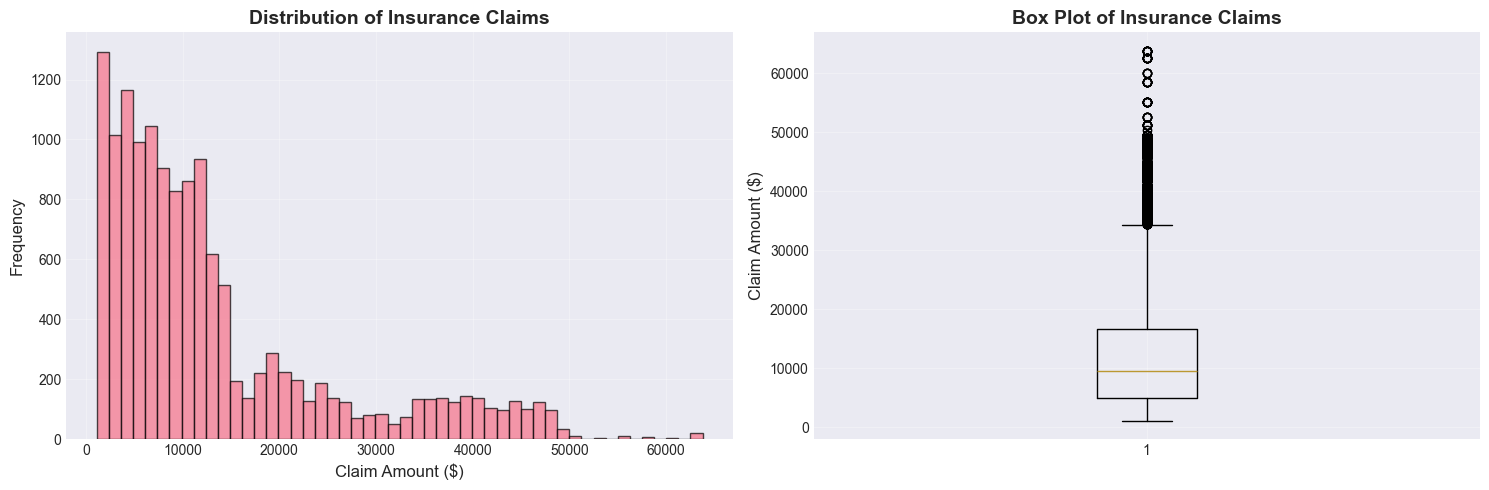

Claim Statistics:
Mean: $13431.81
Median: $9567.00
Std Dev: $12142.10
Min: $1121.90
Max: $63770.40


In [ ]:
# Distribution of target variable (claim)
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Histogram
axes[0].hist(df_clean['claim'], bins=50, edgecolor='black', alpha=0.7)
axes[0].set_title('Distribution of Insurance Claims', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Claim Amount ($)', fontsize=12)
axes[0].set_ylabel('Frequency', fontsize=12)
axes[0].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"Claim Statistics:")
print(f"Mean: ${df_clean['claim'].mean():.2f}")
print(f"Median: ${df_clean['claim'].median():.2f}")
print(f"Std Dev: ${df_clean['claim'].std():.2f}")
print(f"Min: ${df_clean['claim'].min():.2f}")
print(f"Max: ${df_clean['claim'].max():.2f}")


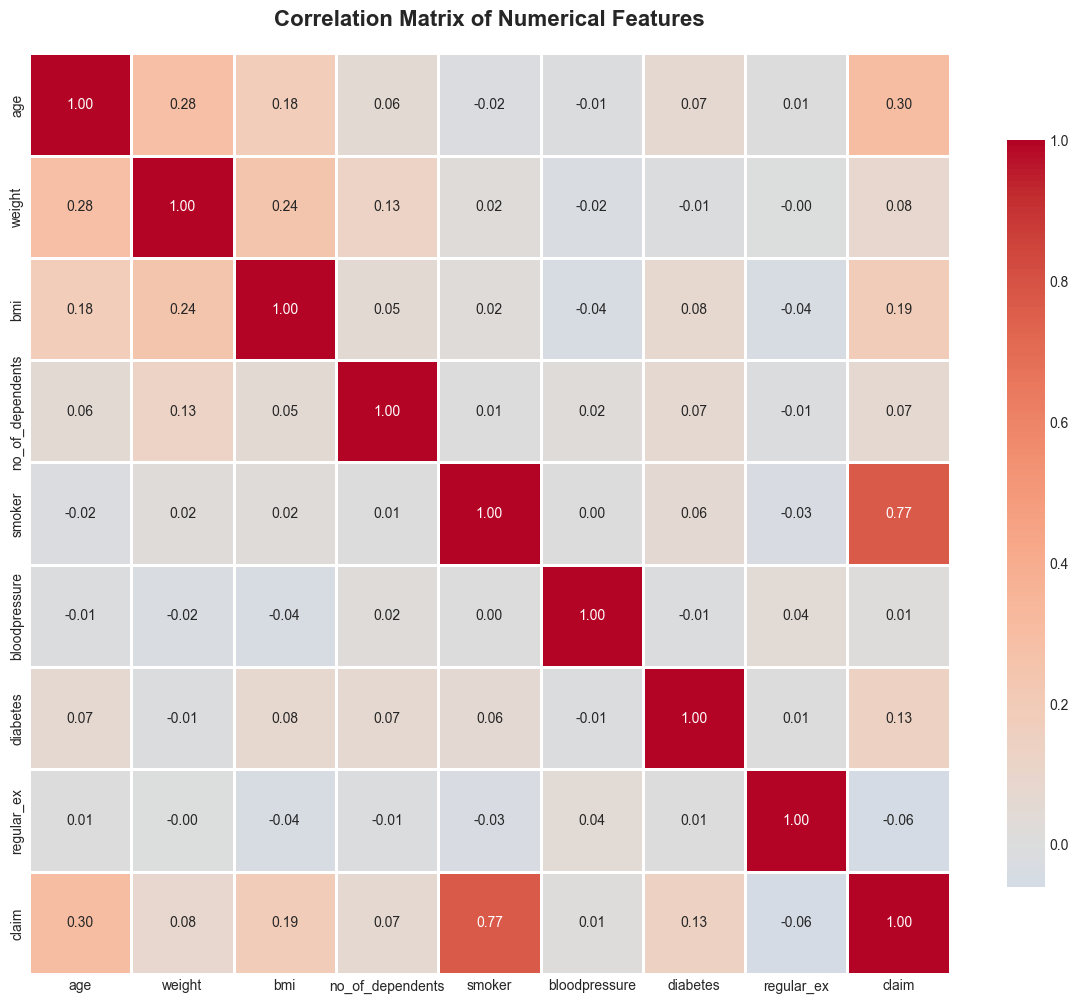

In [8]:
# Correlation matrix
numeric_cols = ['age', 'weight', 'bmi', 'no_of_dependents', 'smoker', 
                'bloodpressure', 'diabetes', 'regular_ex', 'claim']
correlation_matrix = df_clean[numeric_cols].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', 
            center=0, square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Correlation Matrix of Numerical Features', fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()


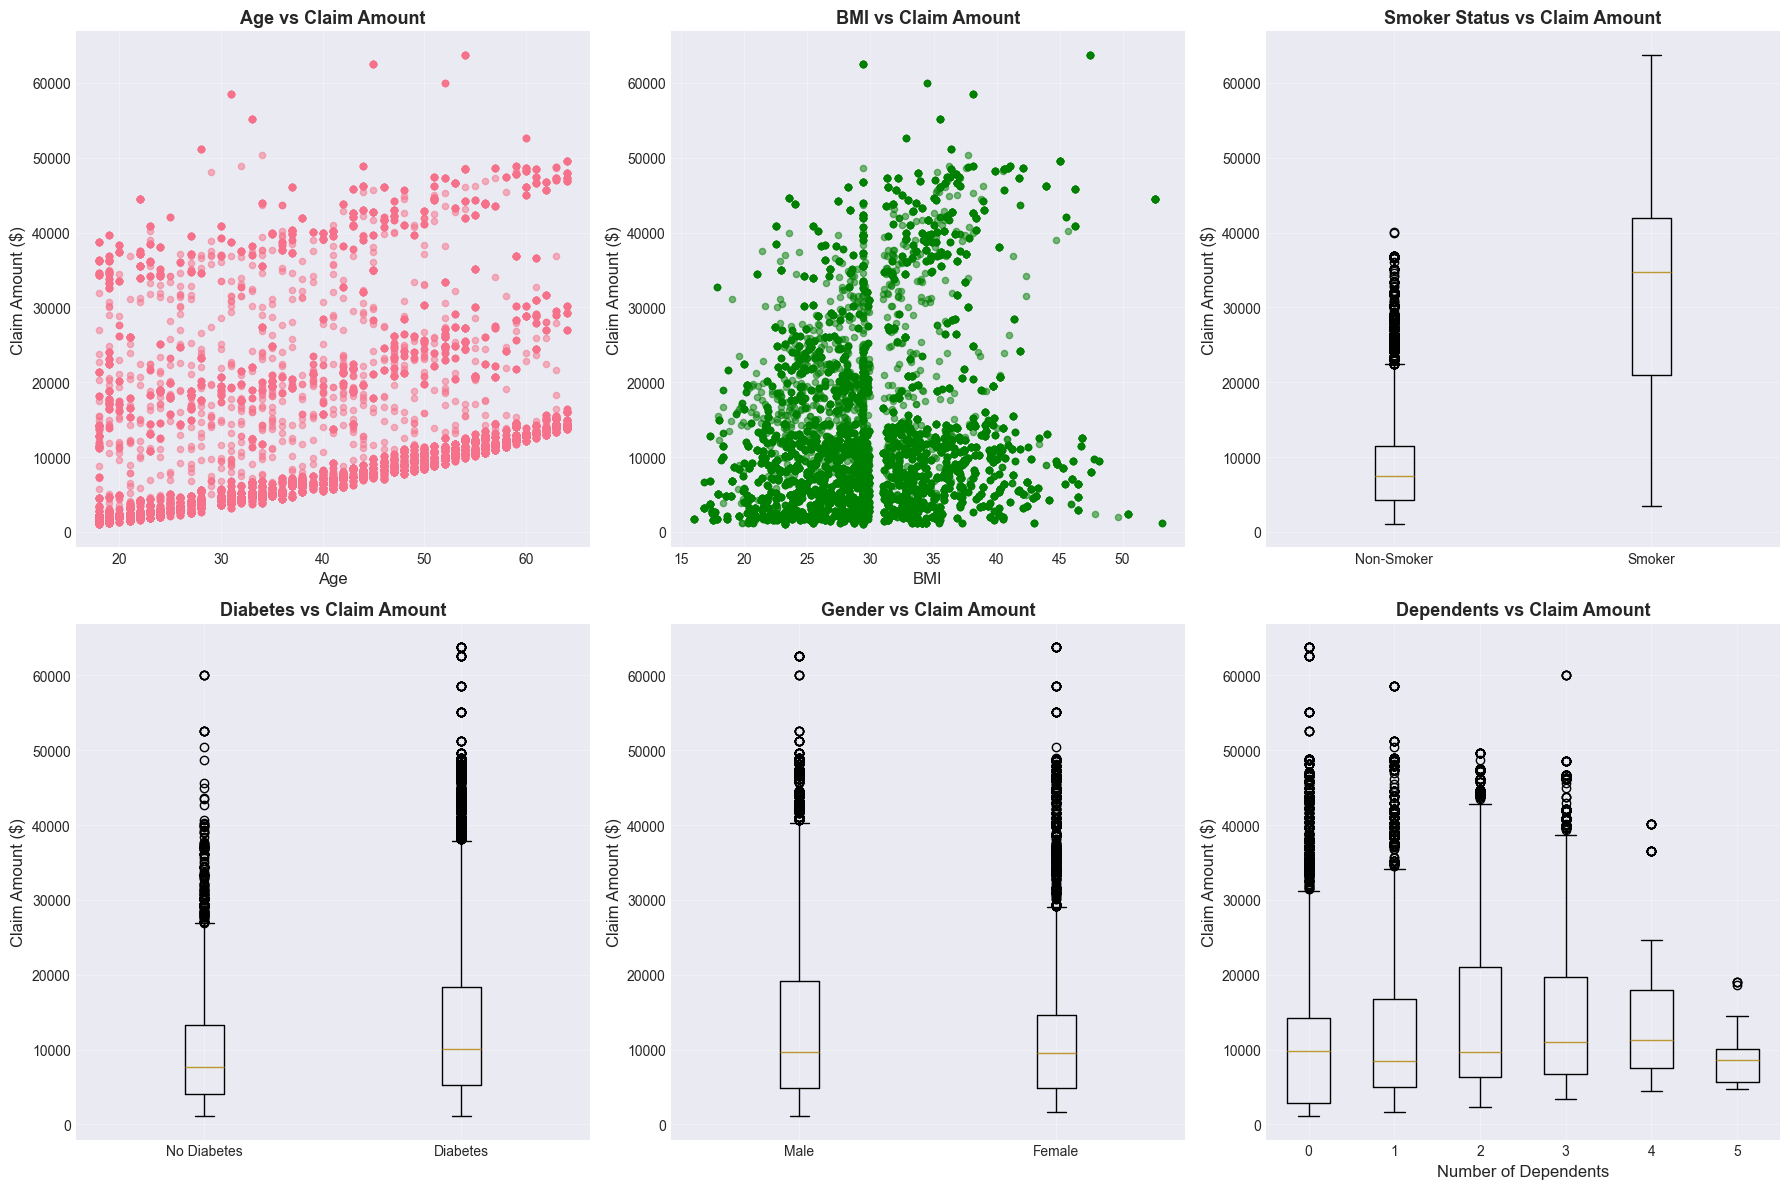

In [9]:
# Visualize relationships between key features and claim
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# Age vs Claim
axes[0, 0].scatter(df_clean['age'], df_clean['claim'], alpha=0.5, s=20)
axes[0, 0].set_xlabel('Age', fontsize=12)
axes[0, 0].set_ylabel('Claim Amount ($)', fontsize=12)
axes[0, 0].set_title('Age vs Claim Amount', fontsize=13, fontweight='bold')
axes[0, 0].grid(True, alpha=0.3)

# BMI vs Claim
axes[0, 1].scatter(df_clean['bmi'], df_clean['claim'], alpha=0.5, s=20, color='green')
axes[0, 1].set_xlabel('BMI', fontsize=12)
axes[0, 1].set_ylabel('Claim Amount ($)', fontsize=12)
axes[0, 1].set_title('BMI vs Claim Amount', fontsize=13, fontweight='bold')
axes[0, 1].grid(True, alpha=0.3)

# Smoker vs Claim
smoker_claims = [df_clean[df_clean['smoker']==0]['claim'], 
                 df_clean[df_clean['smoker']==1]['claim']]
axes[0, 2].boxplot(smoker_claims, labels=['Non-Smoker', 'Smoker'])
axes[0, 2].set_ylabel('Claim Amount ($)', fontsize=12)
axes[0, 2].set_title('Smoker Status vs Claim Amount', fontsize=13, fontweight='bold')
axes[0, 2].grid(True, alpha=0.3)

# Diabetes vs Claim
diabetes_claims = [df_clean[df_clean['diabetes']==0]['claim'], 
                   df_clean[df_clean['diabetes']==1]['claim']]
axes[1, 0].boxplot(diabetes_claims, labels=['No Diabetes', 'Diabetes'])
axes[1, 0].set_ylabel('Claim Amount ($)', fontsize=12)
axes[1, 0].set_title('Diabetes vs Claim Amount', fontsize=13, fontweight='bold')
axes[1, 0].grid(True, alpha=0.3)

# Sex vs Claim
sex_claims = [df_clean[df_clean['sex']=='male']['claim'], 
              df_clean[df_clean['sex']=='female']['claim']]
axes[1, 1].boxplot(sex_claims, labels=['Male', 'Female'])
axes[1, 1].set_ylabel('Claim Amount ($)', fontsize=12)
axes[1, 1].set_title('Gender vs Claim Amount', fontsize=13, fontweight='bold')
axes[1, 1].grid(True, alpha=0.3)

# Number of Dependents vs Claim
dependents_claims = [df_clean[df_clean['no_of_dependents']==i]['claim'] 
                     for i in sorted(df_clean['no_of_dependents'].unique())]
axes[1, 2].boxplot(dependents_claims, labels=sorted(df_clean['no_of_dependents'].unique()))
axes[1, 2].set_xlabel('Number of Dependents', fontsize=12)
axes[1, 2].set_ylabel('Claim Amount ($)', fontsize=12)
axes[1, 2].set_title('Dependents vs Claim Amount', fontsize=13, fontweight='bold')
axes[1, 2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


## Exploratory Data Analysis (EDA) and Statistical Analysis


In [10]:
# Statistical analysis by groups
print("="*60)
print("STATISTICAL ANALYSIS BY SMOKER STATUS")
print("="*60)
smoker_stats = df_clean.groupby('smoker')['claim'].agg(['count', 'mean', 'median', 'std', 'min', 'max'])
smoker_stats.columns = ['Count', 'Mean', 'Median', 'Std Dev', 'Min', 'Max']
print(smoker_stats)

print("\n" + "="*60)
print("STATISTICAL ANALYSIS BY DIABETES STATUS")
print("="*60)
diabetes_stats = df_clean.groupby('diabetes')['claim'].agg(['count', 'mean', 'median', 'std', 'min', 'max'])
diabetes_stats.columns = ['Count', 'Mean', 'Median', 'Std Dev', 'Min', 'Max']
print(diabetes_stats)

print("\n" + "="*60)
print("STATISTICAL ANALYSIS BY GENDER")
print("="*60)
gender_stats = df_clean.groupby('sex')['claim'].agg(['count', 'mean', 'median', 'std', 'min', 'max'])
gender_stats.columns = ['Count', 'Mean', 'Median', 'Std Dev', 'Min', 'Max']
print(gender_stats)


STATISTICAL ANALYSIS BY SMOKER STATUS
        Count          Mean   Median       Std Dev     Min      Max
smoker                                                             
0       11114   8745.036513   7512.3   6237.701515  1121.9  40114.8
1        2790  32101.649642  34779.6  11986.510337  3480.8  63770.4

STATISTICAL ANALYSIS BY DIABETES STATUS
          Count          Mean   Median       Std Dev     Min      Max
diabetes                                                             
0          3182  10426.802577   7742.1   8795.154784  1131.5  60021.4
1         10722  14323.619894  10118.4  12835.919023  1121.9  63770.4

STATISTICAL ANALYSIS BY GENDER
        Count          Mean  Median       Std Dev     Min      Max
sex                                                               
female   7091  12748.322000  9541.7  11322.934398  1607.5  63770.4
male     6813  14143.194921  9617.7  12902.169164  1121.9  62592.9


In [11]:
# Prepare features for modeling
# Select features for regression
feature_cols = ['age', 'weight', 'bmi', 'no_of_dependents', 'smoker', 
                'bloodpressure', 'diabetes', 'regular_ex',
                'sex_encoded', 'hereditary_diseases_encoded', 
                'city_encoded', 'job_title_encoded']

X = df_clean[feature_cols]
y = df_clean['claim']

print(f"Feature matrix shape: {X.shape}")
print(f"Target vector shape: {y.shape}")
print(f"\nFeatures used: {feature_cols}")


Feature matrix shape: (13904, 12)
Target vector shape: (13904,)

Features used: ['age', 'weight', 'bmi', 'no_of_dependents', 'smoker', 'bloodpressure', 'diabetes', 'regular_ex', 'sex_encoded', 'hereditary_diseases_encoded', 'city_encoded', 'job_title_encoded']
